# 1. Import and Install Dependencies

In [2]:
#!pip install tensorflow
#!pip install opencv-python
!pip install mediapipe==0.10.11
#!pip install moviepy 
#!pip install --upgrade protobuf
#!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached mediapipe-0.10.11-cp39-cp39-win_amd64.whl.metadata (9.8 kB)
Using cached mediapipe-0.10.11-cp39-cp39-win_amd64.whl (50.8 MB)


In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time

In [2]:
import mediapipe as mp

NameError: name 'framework' is not defined

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )

In [9]:
cap = cv2.VideoCapture(r'urald\02\10.MOV')
# Get the original frame width and height
original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Calculate the new width and height for resizing (reduce to 50% size)
new_width = int(original_width * 0.5)
new_height = int(original_height * 0.5)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.resize(frame, (new_width, new_height))
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
draw_landmarks(frame, results)

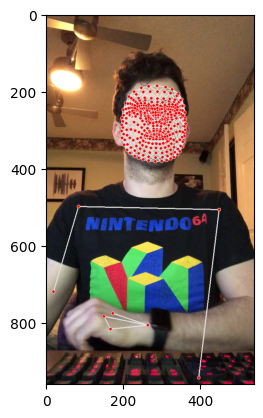

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 0.53130239,  0.29260486, -1.45366347, ...,  0.63018894,
        0.25914145,  0.05896182])

In [ ]:
result_test.shape

(1536,)

# 4. Pre process videos trim

## 4.1 Awake videos

In [ ]:
import os

# get the average second of the all the videos 
def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count/fps
    cap.release()
    return duration

folder_path = 'data/train_videos/awake'
video_files = os.listdir(folder_path)
shortest_duration = int(9)



In [ ]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# Define the input and output directories
input_dir = 'data/train_videos/awake'
output_dir = 'data/train_videos/awake_trimmed'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get the list of video files in the input directory
video_files = os.listdir(input_dir)

# Trim each video file
for file in video_files:
    # Get the full path of the input video file
    video_path = os.path.join(input_dir, file)
    
    # Set the output path for the trimmed video
    output_path = os.path.join(output_dir, file)
    
    # Trim the video using ffmpeg_extract_subclip function from MoviePy
    ffmpeg_extract_subclip(video_path, 0, shortest_duration, targetname=output_path)


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
Moviepy - Running:
>>> "+ " ".join

In [ ]:
# Define the input directory
input_dir = 'data/train_videos/awake_trimmed'

# Get the list of video files in the input directory
video_files = os.listdir(input_dir)

# Calculate the average duration of the video files
total_duration = 0
for file in video_files:
    video_path = os.path.join(input_dir, file)
    duration = get_video_duration(video_path)
    total_duration += duration

average_duration = total_duration / len(video_files)
print(f'Average video duration: {average_duration} seconds')

Average video duration: 9.065842253364472 seconds


# 5. Extract feats

## Setup for drowsy

In [ ]:
import os

# Define the directory path
directory = r'urald'

# Initialize counters for .mp4 and .mov files
mp4_count = 0
mov_count = 0

# Loop through the folders
for i in range(1, 37):  # Assuming folder names are from '01' to '36'
    folder_name = '{:02d}'.format(i)  # Format folder name with leading zero
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the folder exists
    if os.path.isdir(folder_path):
        # Count the number of .mp4 and .mov files in the folder
        files_in_folder = os.listdir(folder_path)
        mp4_count += len([f for f in files_in_folder if f.lower().endswith(('.mp4', '.mp4'))])
        mov_count += len([f for f in files_in_folder if f.lower().endswith(('.mov', '.mov'))])
        print("Folder:", folder_name, "Number of .mp4 files:", mp4_count)
        print("Folder:", folder_name, "Number of .mov files:", mov_count)

# Print the total counts
print("Total .mp4 files:", mp4_count)
print("Total .mov files:", mov_count)
print("Total files:", mp4_count + mov_count)


Folder: 01 Number of .mp4 files: 0
Folder: 01 Number of .mov files: 3
Folder: 02 Number of .mp4 files: 0
Folder: 02 Number of .mov files: 6
Folder: 03 Number of .mp4 files: 0
Folder: 03 Number of .mov files: 9
Folder: 04 Number of .mp4 files: 3
Folder: 04 Number of .mov files: 9
Folder: 05 Number of .mp4 files: 3
Folder: 05 Number of .mov files: 12
Folder: 06 Number of .mp4 files: 6
Folder: 06 Number of .mov files: 12
Folder: 07 Number of .mp4 files: 9
Folder: 07 Number of .mov files: 12
Folder: 08 Number of .mp4 files: 12
Folder: 08 Number of .mov files: 12
Folder: 09 Number of .mp4 files: 15
Folder: 09 Number of .mov files: 12
Folder: 10 Number of .mp4 files: 15
Folder: 10 Number of .mov files: 15
Folder: 11 Number of .mp4 files: 18
Folder: 11 Number of .mov files: 15
Folder: 12 Number of .mp4 files: 21
Folder: 12 Number of .mov files: 15
Folder: 13 Number of .mp4 files: 24
Folder: 13 Number of .mov files: 15
Folder: 14 Number of .mp4 files: 27
Folder: 14 Number of .mov files: 15
Fol

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import os
import json

# Define the directory path
directory = r'urald'

# Create output directories for each class
output_dir_alert = os.path.join('new_urald', 'alert')
output_dir_neutral = os.path.join('new_urald', 'neutral')
output_dir_drowsy = os.path.join('new_urald', 'drowsy')

for output_dir in [output_dir_alert, output_dir_neutral, output_dir_drowsy]:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Load or initialize cache for sequence numbers
cache_file = "sequence_cache.json"
if os.path.exists(cache_file):
    with open(cache_file, 'r') as f:
        sequence_cache = json.load(f)
else:
    sequence_cache = {"alert": 0, "neutral": 0, "drowsy": 0}

# Load or initialize cache for processed files
processed_files_cache = set()
processed_files_cache_file = "processed_files_cache.json"
if os.path.exists(processed_files_cache_file):
    with open(processed_files_cache_file, 'r') as f:
        processed_files_cache = set(json.load(f))

# Process videos
for i in range(1, 37):  # Assuming folder names are from '01' to '36'
    folder_name = '{:02d}'.format(i)  # Format folder name with leading zero
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the folder exists
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.lower().endswith((".mp4", ".mov")):  # Process only MP4 and MOV files
                file_identifier = os.path.join(folder_name, filename)
                if file_identifier in processed_files_cache:
                    print("Skipping already processed file:", file_identifier)
                    continue
                
                print("Processing video:", file_identifier)
                video_path = os.path.join(folder_path, filename)
                file_name = os.path.splitext(filename)[0]
                
                # Determine class based on the file name
                if file_name.startswith('0'):
                    class_dir = output_dir_alert
                    class_cache = "alert"
                elif file_name.startswith('5'):
                    class_dir = output_dir_neutral
                    class_cache = "neutral"
                elif file_name.startswith('10'):
                    class_dir = output_dir_drowsy
                    class_cache = "drowsy"
                else:
                    print("Skipping video:", file_identifier, "as it does not belong to any class.")
                    continue
                
                # Retrieve last sequence number from cache
                total_sequence_num = sequence_cache[class_cache]
                
                # Initialize frame counters
                frame_num = 0
                
                # Open video capture
                cap = cv2.VideoCapture(video_path)
                
                # Initiate holistic model
                mp_holistic = mp.solutions.holistic
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    while cap.isOpened():
                        ret, frame = cap.read()
                        
                        if not ret:  # If no frame is returned, break the loop
                            break
                        
                        # Recolor Feed
                        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        image.flags.writeable = False        
                        
                        # Make Detections
                        results = holistic.process(image)
                        
                        # Extract keypoints
                        keypoints = extract_keypoints(results)
                        
                        # Save keypoints as .npy
                        if frame_num % 75 == 0:
                            sequence_dir = os.path.join(class_dir, str(total_sequence_num))
                            if not os.path.exists(sequence_dir):
                                os.makedirs(sequence_dir)
                            print("Processing sequence:", total_sequence_num)
                            total_sequence_num += 1
                            
                            # Update cache with the latest sequence number for the class
                            sequence_cache[class_cache] = total_sequence_num
                            
                            # Save caches to files after processing each new sequence
                            with open(cache_file, 'w') as f:
                                json.dump(sequence_cache, f)
                        
                        npy_path = os.path.join(sequence_dir, f'{frame_num % 75}.npy')
                        np.save(npy_path, keypoints)
                        
                        frame_num += 1
                        
                    cap.release()
                
                # Add processed file to cache
                processed_files_cache.add(file_identifier)

# Save processed files cache to file
with open(processed_files_cache_file, 'w') as f:
    json.dump(list(processed_files_cache), f)


# 5. Preprocess Data and Create Labels and Features

In [ ]:
import os
import shutil

# Path to the directory containing the subfolders
directory = "new_urald/alert"

# List to store names of deleted folders
deleted_folders = []

# Iterate through each subfolder
for index, folder_name in enumerate(sorted(os.listdir(directory))):
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Count the number of .npy files in the folder
        num_files = len([f for f in os.listdir(folder_path) if f.endswith('.npy')])
        
        # If the number of files is not 75, delete the folder
        if num_files != 75:
            print(f"Deleting folder '{folder_name}' because it doesn't contain exactly 75 .npy files.")
            deleted_folders.append(folder_name)
            shutil.rmtree(folder_path)
        else:
            # Rename the folder to have a consistent numbering
            new_folder_name = str(index).zfill(len(str(len(os.listdir(directory)))))
            os.rename(folder_path, os.path.join(directory, new_folder_name))

print("Folders deleted:", deleted_folders)

Deleting folder '4136' because it doesn't contain exactly 75 .npy files.
Deleting folder '4377' because it doesn't contain exactly 75 .npy files.
Deleting folder '4639' because it doesn't contain exactly 75 .npy files.
Deleting folder '484' because it doesn't contain exactly 75 .npy files.
Deleting folder '4882' because it doesn't contain exactly 75 .npy files.
Deleting folder '5125' because it doesn't contain exactly 75 .npy files.
Deleting folder '5360' because it doesn't contain exactly 75 .npy files.
Deleting folder '5433' because it doesn't contain exactly 75 .npy files.
Deleting folder '5434' because it doesn't contain exactly 75 .npy files.
Deleting folder '5675' because it doesn't contain exactly 75 .npy files.
Deleting folder '5919' because it doesn't contain exactly 75 .npy files.
Deleting folder '6196' because it doesn't contain exactly 75 .npy files.
Deleting folder '6265' because it doesn't contain exactly 75 .npy files.
Deleting folder '6275' because it doesn't contain ex

In [ ]:
# Path to the directory containing the subfolders
directory = "new_urald/neutral"

# List to store names of deleted folders
deleted_folders = []

# Iterate through each subfolder
for index, folder_name in enumerate(sorted(os.listdir(directory))):
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Count the number of .npy files in the folder
        num_files = len([f for f in os.listdir(folder_path) if f.endswith('.npy')])
        
        # If the number of files is not 75, delete the folder
        if num_files != 75:
            print(f"Deleting folder '{folder_name}' because it doesn't contain exactly 75 .npy files.")
            deleted_folders.append(folder_name)
            shutil.rmtree(folder_path)
        else:
            # Rename the folder to have a consistent numbering
            new_folder_name = str(index).zfill(len(str(len(os.listdir(directory)))))
            os.rename(folder_path, os.path.join(directory, new_folder_name))

print("Folders deleted:", deleted_folders)

Deleting folder '1212' because it doesn't contain exactly 75 .npy files.
Deleting folder '1387' because it doesn't contain exactly 75 .npy files.
Deleting folder '1626' because it doesn't contain exactly 75 .npy files.
Deleting folder '1867' because it doesn't contain exactly 75 .npy files.
Deleting folder '2112' because it doesn't contain exactly 75 .npy files.
Deleting folder '2361' because it doesn't contain exactly 75 .npy files.
Deleting folder '239' because it doesn't contain exactly 75 .npy files.
Deleting folder '2493' because it doesn't contain exactly 75 .npy files.
Deleting folder '2745' because it doesn't contain exactly 75 .npy files.
Deleting folder '3019' because it doesn't contain exactly 75 .npy files.
Deleting folder '3283' because it doesn't contain exactly 75 .npy files.
Deleting folder '3531' because it doesn't contain exactly 75 .npy files.
Deleting folder '3725' because it doesn't contain exactly 75 .npy files.
Deleting folder '3969' because it doesn't contain ex

In [ ]:
# Path to the directory containing the subfolders
directory = "new_urald/drowsy"

# List to store names of deleted folders
deleted_folders = []

# Iterate through each subfolder
for index, folder_name in enumerate(sorted(os.listdir(directory))):
    folder_path = os.path.join(directory, folder_name)
    
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Count the number of .npy files in the folder
        num_files = len([f for f in os.listdir(folder_path) if f.endswith('.npy')])
        
        # If the number of files is not 75, delete the folder
        if num_files != 75:
            print(f"Deleting folder '{folder_name}' because it doesn't contain exactly 75 .npy files.")
            deleted_folders.append(folder_name)
            shutil.rmtree(folder_path)
        else:
            # Rename the folder to have a consistent numbering
            new_folder_name = str(index).zfill(len(str(len(os.listdir(directory)))))
            os.rename(folder_path, os.path.join(directory, new_folder_name))

print("Folders deleted:", deleted_folders)

Deleting folder '1176' because it doesn't contain exactly 75 .npy files.
Deleting folder '1313' because it doesn't contain exactly 75 .npy files.
Deleting folder '1553' because it doesn't contain exactly 75 .npy files.
Deleting folder '1793' because it doesn't contain exactly 75 .npy files.
Deleting folder '2058' because it doesn't contain exactly 75 .npy files.
Deleting folder '2310' because it doesn't contain exactly 75 .npy files.
Deleting folder '240' because it doesn't contain exactly 75 .npy files.
Deleting folder '2453' because it doesn't contain exactly 75 .npy files.
Deleting folder '2655' because it doesn't contain exactly 75 .npy files.
Deleting folder '2902' because it doesn't contain exactly 75 .npy files.
Deleting folder '3152' because it doesn't contain exactly 75 .npy files.
Deleting folder '3399' because it doesn't contain exactly 75 .npy files.
Deleting folder '3593' because it doesn't contain exactly 75 .npy files.
Deleting folder '3836' because it doesn't contain ex

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
class_label = ['alert','neutral','drowsy']
label_map = {label:num for num, label in enumerate(class_label)}
label_map

{'alert': 0, 'neutral': 1, 'drowsy': 2}

In [ ]:
import os
import numpy as np
import joblib

sequences, labels = [], []
DATA_PATH = 'new_urald'
sequence_length = 75
label_map = {'alert': 0, 'neutral': 1, 'drowsy': 2}
drowsy_count = 0
alert_count = 0
neutral_count = 0

# Load cached data if available
cached_data_path = 'cached_data.pkl'
if os.path.exists(cached_data_path):
    print("Loading cached data...")
    sequences, labels, drowsy_count, alert_count, neutral_count = joblib.load(cached_data_path)
else:
    print("Cached data not found, loading and processing sequences...")

    for state in label_map:
        for sequence_folder in os.listdir(os.path.join(DATA_PATH, state)):
            sequence_path = os.path.join(DATA_PATH, state, sequence_folder)
            if os.path.isdir(sequence_path):  # Check if it's a folder
                window = []
                for frame_num in range(sequence_length):
                    # Adjust frame_num_formatted based on the actual numbering of your files
                    frame_num_formatted = "{}.npy".format(frame_num)  # Use the correct file name format
                    res_path = os.path.join(sequence_path, frame_num_formatted)
                    if os.path.exists(res_path):  # Check if the file exists
                        res = np.load(res_path)
                        window.append(res)
                    else:
                        print("File {} does not exist, skipping...".format(res_path))
                        break  # Exit the loop if a file is missing
                if len(window) == sequence_length:
                    sequences.append(window)
                    labels.append(label_map[state])
                    if state == "neutral":
                        neutral_count += 1
                    elif state == "alert":
                        alert_count += 1
                    elif state == "drowsy":
                        drowsy_count += 1
                else:
                    print("Sequence {} has length {}, skipping...".format(sequence_folder, len(window)))

    # Cache the data and counts
    data_to_cache = (sequences, labels, drowsy_count, alert_count, neutral_count)
    joblib.dump(data_to_cache, cached_data_path)
    print("Cached data saved.")

print("Number of drowsy sequences:", drowsy_count)
print("Number of alert sequences:", alert_count)
print("Number of neutral sequences:", neutral_count)


Loading cached data...
Number of drowsy sequences: 2825
Number of alert sequences: 2719
Number of neutral sequences: 2707


In [ ]:
import os
import numpy as np
import joblib

sequences, labels = [], []
DATA_PATH = 'new_urald'
sequence_length = 75
label_map = {'alert': 0, 'neutral': 1, 'drowsy': 2}
drowsy_count = 0
alert_count = 0
neutral_count = 0

# Function to load and preprocess .npy files
def load_and_preprocess_npy(file_path):
    landmarks = np.load(file_path)
    # Remove the first 33x4 elements to convert it into 1404
    face_landmarks = landmarks[33*4:]
    return face_landmarks

# Load cached data if available
cached_data_path = 'cached_data.pkl'
if os.path.exists(cached_data_path):
    print("Loading cached data...")
    sequences, labels, drowsy_count, alert_count, neutral_count = joblib.load(cached_data_path)
else:
    print("Cached data not found, loading and processing sequences...")

    for state in label_map:
        for sequence_folder in os.listdir(os.path.join(DATA_PATH, state)):
            sequence_path = os.path.join(DATA_PATH, state, sequence_folder)
            if os.path.isdir(sequence_path):  # Check if it's a folder
                window = []
                for frame_num in range(sequence_length):
                    # Adjust frame_num_formatted based on the actual numbering of your files
                    frame_num_formatted = "{}.npy".format(frame_num)  # Use the correct file name format
                    res_path = os.path.join(sequence_path, frame_num_formatted)
                    if os.path.exists(res_path):  # Check if the file exists
                        # Load and preprocess the .npy file
                        res = load_and_preprocess_npy(res_path)
                        window.append(res)
                    else:
                        print("File {} does not exist, skipping...".format(res_path))
                        break  # Exit the loop if a file is missing
                if len(window) == sequence_length:
                    sequences.append(window)
                    labels.append(label_map[state])
                    if state == "neutral":
                        neutral_count += 1
                    elif state == "alert":
                        alert_count += 1
                    elif state == "drowsy":
                        drowsy_count += 1
                else:
                    print("Sequence {} has length {}, skipping...".format(sequence_folder, len(window)))

    # Cache the data and counts
    data_to_cache = (sequences, labels, drowsy_count, alert_count, neutral_count)
    joblib.dump(data_to_cache, cached_data_path)
    print("Cached data saved.")

print("Number of drowsy sequences:", drowsy_count)
print("Number of alert sequences:", alert_count)
print("Number of neutral sequences:", neutral_count)

Loading cached data...
Number of drowsy sequences: 2825
Number of alert sequences: 2719
Number of neutral sequences: 2707


In [ ]:
np.array(sequences).shape

(8251, 75, 1404)

In [ ]:
np.array(labels).shape

(8251,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(8251, 75, 1404)

In [ ]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
# Count instances of each class
class_instances = np.sum(y, axis=0)

print("Class instances:", class_instances)

Class instances: [2719 2707 2825]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=1234)

In [ ]:
import joblib

# Save the split datasets to disk using joblib
joblib.dump(X_train, 'X_train.pkl')
joblib.dump(X_val, 'X_val.pkl')
joblib.dump(X_test, 'X_test.pkl')
joblib.dump(y_train, 'y_train.pkl')
joblib.dump(y_val, 'y_val.pkl')
joblib.dump(y_test, 'y_test.pkl')

['y_test.pkl']

In [ ]:
import joblib
# Load the split datasets from disk using joblib
X_train = joblib.load('X_train.pkl')
X_val = joblib.load('X_val.pkl')
X_test = joblib.load('X_test.pkl')
y_train = joblib.load('y_train.pkl')
y_val = joblib.load('y_val.pkl')
y_test = joblib.load('y_test.pkl')

In [ ]:
y_test.shape

(166, 3)

# 7. Build and Train LSTM Neural Network

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU,Dropout,GlobalMaxPooling1D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

# Print the list of available physical GPUs
print("Physical GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Print the list of available logical GPUs
print("Logical GPUs Available:", len(tf.config.experimental.list_logical_devices('GPU')))

Physical GPUs Available: 1
Logical GPUs Available: 1


In [ ]:
from tensorflow.python.client import device_lib

def check_gpu_usage():
    local_device_protos = device_lib.list_local_devices()
    for device in local_device_protos:
        if device.device_type == 'GPU':
            return True
    return False

# Check if GPU is being used
if check_gpu_usage():
    print("GPU is being used for training.")
else:
    print("No GPU available, training on CPU.")

GPU is being used for training.


In [ ]:
# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
import os
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
del model

## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(75, 1536)))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(GlobalMaxPooling1D())  # Apply global max pooling to reduce the temporal dimension
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(len(class_label), activation='softmax'))

## RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, activation='tanh', input_shape=(30, 1404)))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(SimpleRNN(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(SimpleRNN(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(GlobalMaxPooling1D())  # Apply global max pooling to reduce the temporal dimension
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(len(class_label), activation='softmax'))


## GRU

In [ ]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='tanh', input_shape=(75, 1536)))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(GRU(128, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(GRU(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(GlobalMaxPooling1D())  # Apply global max pooling to reduce the temporal dimension
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(len(class_label), activation='softmax'))

# TRAIN

In [ ]:
class_label

['drowsy', 'awake']

In [ ]:
res = [0.4, 0.6,.8]

In [ ]:
import numpy as np
class_label[np.argmax(res)]

'awake'

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:

tb_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 64)            409856    
                                                                 
 dropout (Dropout)           (None, 75, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 75, 128)           98816     
                                                                 
 dropout_1 (Dropout)         (None, 75, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 75, 64)            49408     
                                                                 
 dropout_2 (Dropout)         (None, 75, 64)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

In [ ]:
# Plot the model horizontally
plot_model(model, to_file='model/gru_model.png', rankdir='LR')

In [ ]:
model.fit(X_train, y_train, 
          epochs=100, 
          validation_data=(X_val, y_val),
          callbacks=[tb_callback])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

# 8. Evaluation

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 30, 64)            307584    
                                                                 
 gru_4 (GRU)                 (None, 30, 128)           74496     
                                                                 
 gru_5 (GRU)                 (None, 64)                37248     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 425,634
Trainable params: 425,634
Non-tr

In [ ]:
res = model.predict(X_test)

5/5 [==============================] - 1s 5ms/step


In [ ]:
print(class_label[np.argmax(res[4])])
print(class_label[np.argmax(y_test[4])])

awake
awake


# 9. Save Weights

In [ ]:
model.save('gru_both_tanh.h5')

In [ ]:
del model

In [2]:
# load model
from tensorflow.keras.models import load_model
model = load_model('gru_both_tanh.h5')

KeyboardInterrupt: 

# 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

5/5 [==============================] - 1s 45ms/step


In [ ]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
confusion_matrix(ytrue, yhat)


array([[63,  1],
       [ 1, 73]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

0.9855072463768116

# 11. Test in Real Time

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('lstm_both_tanh_175.h5', compile=False)

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
class_label = ['alert','neutral','drowsy']
#class_label = ['drowsy','awake']

cap = cv2.VideoCapture(0)
# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)
# Get the original frame width and height
original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Calculate the new width and height for resizing (reduce to 50% size)
new_width = int(original_width * 0.9)
new_height = int(original_height * 0.9)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.resize(frame, (new_width, new_height))
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw landmarks
        draw_styled_landmarks(image, results)
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-75:]
        
        if len(sequence) == 75:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(class_label[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if class_label[np.argmax(res)] != sentence[-1]:
                            sentence.append(class_label[np.argmax(res)])
                    else:
                        sentence.append(class_label[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        
        if cv2.waitKey(fps) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


TypeError: Argument 'delay' is required to be an integer

## Test Dept

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'actions' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7
class_label = ['alert','neutral','drowsy']
res = [0.5,0.4,0.2]
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        #draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-75:]
        
        if len(sequence) == 75:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(class_label[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if class_label[np.argmax(res)] != sentence[-1]:
                            sentence.append(class_label[np.argmax(res)])
                    else:
                        sentence.append(class_label[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, class_label, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# Create for face

In [ ]:
import os
import numpy as np

def extract_face_landmarks(file_path):
    landmarks = np.load(file_path)
    # Extract only face landmarks, assuming the first 33*4 elements correspond to pose landmarks
    face_landmarks = landmarks[33*4:]
    return face_landmarks

# Path to the directory containing the class folders
uraald_directory = "new_urald"

# Iterate through each class folder (alert, neutral, drowsy)
for class_folder in os.listdir(uraald_directory):
    class_folder_path = os.path.join(uraald_directory, class_folder)
    
    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Iterate through each subfolder (0000, 0001, ...)
        for subfolder in os.listdir(class_folder_path):
            subfolder_path = os.path.join(class_folder_path, subfolder)
            
            # Check if it's a directory
            if os.path.isdir(subfolder_path):
                # Create a new directory to store modified files
                modified_subfolder_path = os.path.join("modified_" + class_folder, subfolder)
                os.makedirs(modified_subfolder_path, exist_ok=True)
                
                # Iterate through each .npy file in the subfolder
                for npy_file in os.listdir(subfolder_path):
                    print(f"Processing file: {npy_file}")
                    if npy_file.endswith('.npy'):
                        npy_file_path = os.path.join(subfolder_path, npy_file)
                        modified_npy_file_path = os.path.join(modified_subfolder_path, npy_file)
                        
                        # Extract face landmarks from the .npy file
                        face_landmarks = extract_face_landmarks(npy_file_path)
                        
                        # Save modified .npy file with only face landmarks
                        np.save(modified_npy_file_path, face_landmarks)

print("Face landmarks extracted and saved in 'modified_uraald' folders.")

Processing file: 0.npy
Processing file: 1.npy
Processing file: 10.npy
Processing file: 11.npy
Processing file: 12.npy
Processing file: 13.npy
Processing file: 14.npy
Processing file: 15.npy
Processing file: 16.npy
Processing file: 17.npy
Processing file: 18.npy
Processing file: 19.npy
Processing file: 2.npy
Processing file: 20.npy
Processing file: 21.npy
Processing file: 22.npy
Processing file: 23.npy
Processing file: 24.npy
Processing file: 25.npy
Processing file: 26.npy
Processing file: 27.npy
Processing file: 28.npy
Processing file: 29.npy
Processing file: 3.npy
Processing file: 30.npy
Processing file: 31.npy
Processing file: 32.npy
Processing file: 33.npy
Processing file: 34.npy
Processing file: 35.npy
Processing file: 36.npy
Processing file: 37.npy
Processing file: 38.npy
Processing file: 39.npy
Processing file: 4.npy
Processing file: 40.npy
Processing file: 41.npy
Processing file: 42.npy
Processing file: 43.npy
Processing file: 44.npy
Processing file: 45.npy
Processing file: 46.n

KeyboardInterrupt: 